**Stroke Prediction Data Analysis**


Stroke is a leading cause of death globally. The aim of this project is to analyze patient health data to identify factors that increase stroke risk.

**Dataset Overview**
Source: Kaggle Stroke Prediction Dataset (~5,000 patients)

**Features:**
Age, Gender

Hypertension (0/1)

Heart Disease (0/1)

Avg Glucose Level

BMI

Smoking Status

Target Variable: 1 = Stroke, 0 = No Stroke

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [4]:
# Load Dataset
df = pd.read_csv("stroke_dataset.csv")
print("Shape:", df.shape)
df.head()

Shape: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Data Cleaning
df = df.dropna(subset=["bmi"])
df["bmi"] = df["bmi"].replace(0, df["bmi"].median())
print("Cleaned Shape:", df.shape)


Cleaned Shape: (4909, 12)


In [6]:
# Basic EDA
print("\nStroke Distribution:\n", df["stroke"].value_counts())
print("\nSummary Statistics:\n", df.describe())



Stroke Distribution:
 stroke
0    4700
1     209
Name: count, dtype: int64

Summary Statistics:
                  id          age  hypertension  heart_disease  \
count   4909.000000  4909.000000   4909.000000    4909.000000   
mean   37064.313506    42.865374      0.091872       0.049501   
std    20995.098457    22.555115      0.288875       0.216934   
min       77.000000     0.080000      0.000000       0.000000   
25%    18605.000000    25.000000      0.000000       0.000000   
50%    37608.000000    44.000000      0.000000       0.000000   
75%    55220.000000    60.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        4909.000000  4909.000000  4909.000000  
mean          105.305150    28.893237     0.042575  
std            44.424341     7.854067     0.201917  
min            55.120000    10.300000     0.000000  
25%            77.070000    23.500000     0.000000 

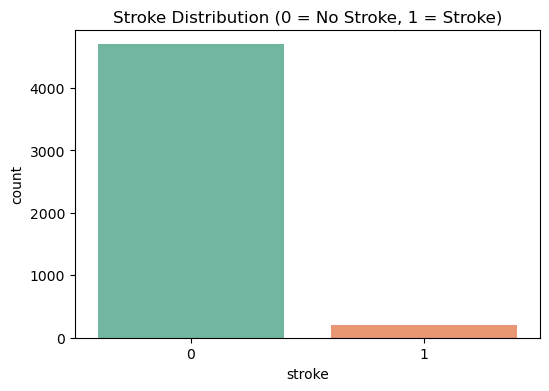

In [14]:
# Visualization 1 - Stroke Count
plt.figure(figsize=(6,4))
sns.countplot(x="stroke", data=df, palette="Set2")
plt.title("Stroke Distribution (0 = No Stroke, 1 = Stroke)")
plt.show()

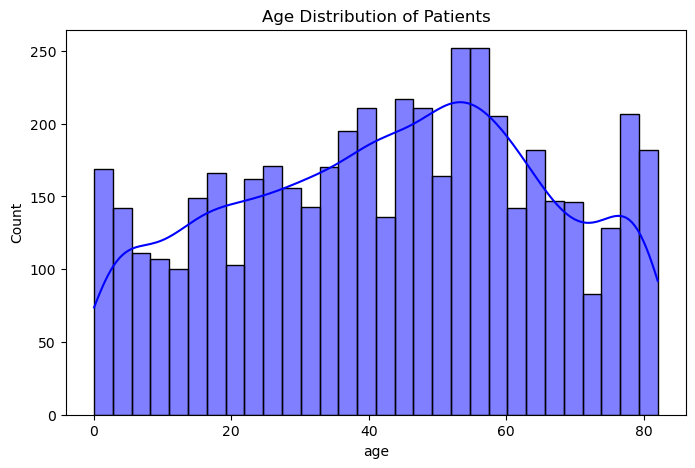

In [15]:
# Visualization 2 - Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution of Patients")
plt.show()

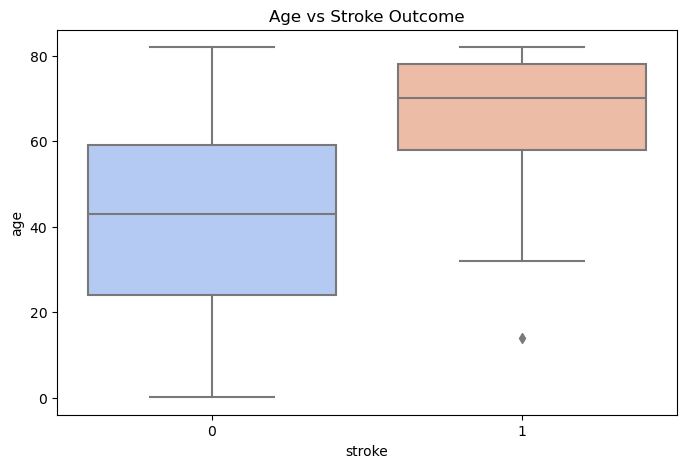

In [16]:
# Visualization 3 - Age vs Stroke
plt.figure(figsize=(8,5))
sns.boxplot(x="stroke", y="age", data=df, palette="coolwarm")
plt.title("Age vs Stroke Outcome")
plt.show()

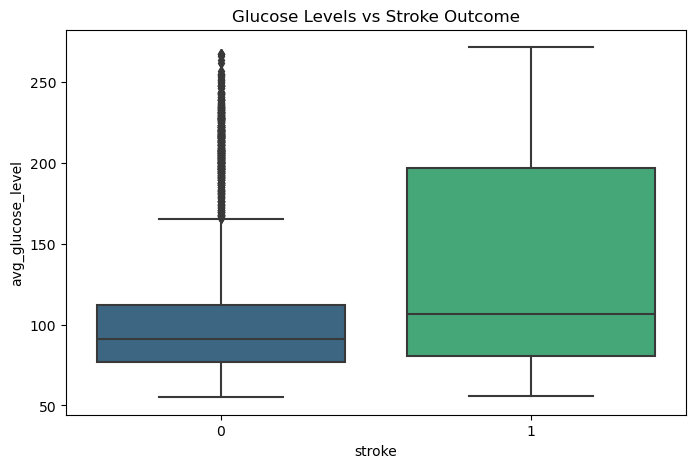

In [17]:
# Visualization 4 - Glucose vs Stroke
plt.figure(figsize=(8,5))
sns.boxplot(x="stroke", y="avg_glucose_level", data=df, palette="viridis")
plt.title("Glucose Levels vs Stroke Outcome")
plt.show()

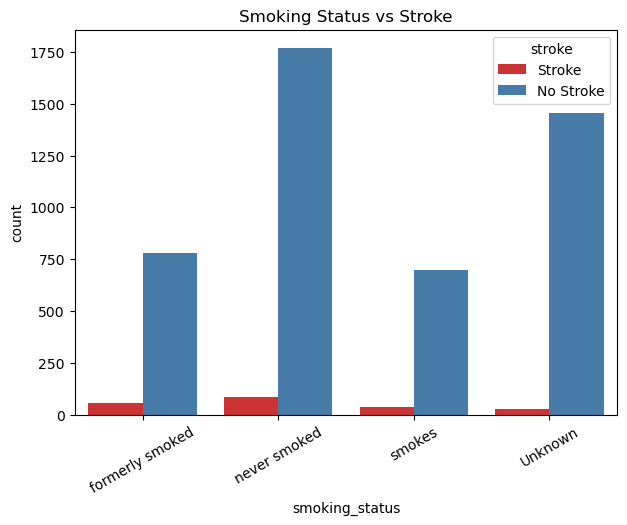

In [19]:
# Convert stroke to categorical
df["stroke"] = df["stroke"].map({0: "No Stroke", 1: "Stroke"})

# Smoking vs Stroke plot
plt.figure(figsize=(7,5))
sns.countplot(x="smoking_status", hue="stroke", data=df, palette="Set1")
plt.title("Smoking Status vs Stroke")
plt.xticks(rotation=30)
plt.show()


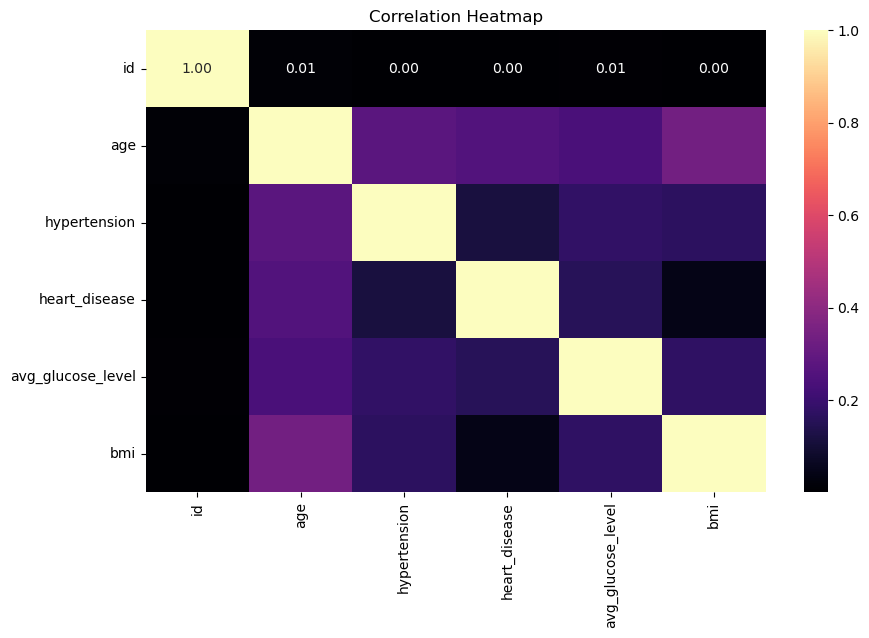

In [21]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="magma", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [22]:
# SQL Integration
conn = sqlite3.connect(":memory:")
df.to_sql("patients", conn, index=False, if_exists="replace")

query1 = "SELECT stroke, COUNT(*) as count FROM patients GROUP BY stroke;"
print("\nStroke Cases:\n", pd.read_sql(query1, conn))

query2 = "SELECT smoking_status, AVG(avg_glucose_level) as avg_glucose FROM patients GROUP BY smoking_status;"
print("\nAverage Glucose by Smoking Status:\n", pd.read_sql(query2, conn))

query3 = "SELECT age, AVG(bmi) as avg_bmi FROM patients GROUP BY age ORDER BY avg_bmi DESC LIMIT 5;"
print("\nTop 5 Ages with Highest Avg BMI:\n", pd.read_sql(query3, conn))



Stroke Cases:
       stroke  count
0  No Stroke   4700
1     Stroke    209

Average Glucose by Smoking Status:
     smoking_status  avg_glucose
0          Unknown    98.335927
1  formerly smoked   112.579821
2     never smoked   107.136215
3           smokes   106.465699

Top 5 Ages with Highest Avg BMI:
     age    avg_bmi
0  52.0  33.342353
1  49.0  32.555263
2  38.0  32.520290
3  41.0  32.388732
4  42.0  32.260294


📊 **Key Insights:**
1. Stroke cases are fewer compared to non-stroke, but risk factors are clear.
2. Patients above 60 years have much higher stroke risk.
3. Higher glucose levels strongly correlate with stroke.
4. Smoking and hypertension significantly increase stroke risk.